In [34]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px

data = pd.read_csv("track.csv")
# abnormal interest_rate
data[data["interest_rate"] >= 100]
# get rid of them
data = data[data["interest_rate"] < 100]

data_accepted = data[data["accepted"] == 1]
data_accepted = data_accepted.drop(columns = ["state_code","county_code", "msa", "lender_credits", "denial_reason"
                                              , "sex", "aus", "total_loan_costs", "lei", "accepted", "balloon_payment","ethnicity",
                                             'applicant_age', 'applicant_age_above_62'])
# remove interest rate = 0
data_accepted = data_accepted[data_accepted["interest_rate"] > 0]

uppBound = data_accepted['combined_loan_to_value_ratio'].mean() + 3 * data_accepted['combined_loan_to_value_ratio'].std()
data_accepted = data_accepted[data_accepted["combined_loan_to_value_ratio"] < uppBound]

# fill nas for discount point
data_accepted["discount_points"].fillna(0, inplace=True)
data_accepted["purchaser_type"].fillna("No purchaser", inplace=True)
data_accepted.dropna(subset = ["census_tract", "debt_to_income_ratio", "income", "property_value"], inplace=True)
data_accepted.isna().sum()
data_accepted.to_csv("cleaned.csv", index = False)

# remove extremely high interest rate 3 std away from mean
data_accepted = data_accepted[data_accepted["interest_rate"] > 0]

data_accepted['combined_loan_to_value_ratio'].mean() + 3 * data_accepted['combined_loan_to_value_ratio'].std()
uppBound = data_accepted['combined_loan_to_value_ratio'].mean() + 3 * data_accepted['combined_loan_to_value_ratio'].std()
data_accepted = data_accepted[data_accepted["combined_loan_to_value_ratio"] < uppBound]

# fill nas for discount point
data_accepted["discount_points"].fillna(0, inplace=True)
data_accepted["purchaser_type"].fillna("No purchaser", inplace=True)
data_accepted.dropna(subset = ["census_tract", "debt_to_income_ratio", "property_value"], inplace=True)
data_accepted.isna().sum()
data_accepted.to_csv("cleaned.csv", index = False)
print(data_accepted.isna().sum())

# ordinalEncoder
from sklearn.preprocessing import OrdinalEncoder
ratio_sort = [ '<20%', '20%-<30%', '30%-<36%', '36%-<41%','41%-<46%', '46%-<50%','50%-60%','>60%']
ratio_enc = OrdinalEncoder(categories=[ratio_sort])
data_accepted['debt_to_income_ratio'] = ratio_enc.fit_transform(data_accepted['debt_to_income_ratio'].values.reshape(-1, 1))

data_dummy = data_accepted.copy()
data_accepted.dtypes



year                              0
census_tract                      0
race                              0
income                            0
debt_to_income_ratio              0
tract_one_to_four_family_homes    0
tract_median_age_of_hu            0
tract_minority_pop_percent        0
tract_population                  0
tract_to_msa_income_percentage    0
purchaser_type                    0
ffiec_msa_md_median_fam_income    0
business_or_commercial_purpose    0
combined_loan_to_value_ratio      0
conforming_loan_limit             0
construction_method               0
discount_points                   0
interest_rate                     0
loan_amount                       0
loan_type                         0
lien_status                       0
occupancy_type                    0
property_value                    0
total_units                       0
dtype: int64


year                                int64
census_tract                      float64
race                               object
income                            float64
debt_to_income_ratio              float64
tract_one_to_four_family_homes    float64
tract_median_age_of_hu            float64
tract_minority_pop_percent        float64
tract_population                  float64
tract_to_msa_income_percentage    float64
purchaser_type                     object
ffiec_msa_md_median_fam_income    float64
business_or_commercial_purpose    float64
combined_loan_to_value_ratio      float64
conforming_loan_limit              object
construction_method                object
discount_points                   float64
interest_rate                     float64
loan_amount                       float64
loan_type                          object
lien_status                        object
occupancy_type                     object
property_value                    float64
total_units                       

In [35]:
data_accepted.groupby("census_tract")

In [36]:
#one hot encoding
data_dummy = data_accepted.copy()
data_accepted['debt_to_income_ratio']

from sklearn.preprocessing import OneHotEncoder

#one hot encoding
features_to_encode = list(data_dummy.select_dtypes(include = ['object']).columns)
features_to_encode

for colName in features_to_encode:
    dummies = pd.get_dummies(data_dummy[colName])
    data_dummy = pd.concat([data_dummy, dummies], axis=1)
    data_dummy.drop(labels=[colName], axis=1, inplace=True)
    
from sklearn.model_selection import train_test_split
#X, y = data_dummy.drop(columns=['interest_rate']), data_dummy['interest_rate']
#X.shape, y.shpe
train, test = train_test_split(data_dummy, test_size=0.2)
val, test = train_test_split(test, test_size=0.5)


train.to_csv("train.csv", index = False)
val.to_csv("val.csv", index = False)
test.to_csv("test.csv", index = False)

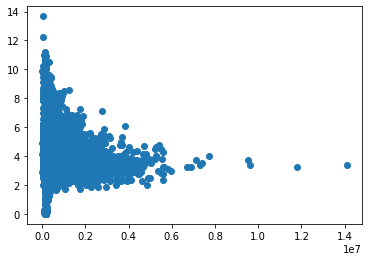

In [18]:
plt.scatter(data_accepted["property_value"], data_accepted["interest_rate"])
plt.show()
